### Importing  Modules

In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as DataReader
from datetime import date

In [2]:
# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv')

# Display first 10 rows
print(nasdaq.head(10))

# Inspect nasdaq
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   
5           FB         Facebook, Inc.     139.39           4.030000e+11   
6        CMCSA    Comcast Corporation      37.14           1.760000e+11   
7         INTC      Intel Corporation      35.25           1.660000e+11   
8         CSCO    Cisco Systems, Inc.      32.42           1.620000e+11   
9         AMGN             Amgen Inc.     161.61           1.190000e+11   

  IPO Year             Sector  \
0     1980         Technology   
1      NAN         Technology   
2     2004         Technology   
3     1986         Technology   
4     199

In [3]:
# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])

# Display the head of the data
print(nasdaq.head())

# Inspect the data
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   

   IPO Year             Sector  \
0    1980.0         Technology   
1       NaN         Technology   
2    2004.0         Technology   
3    1986.0         Technology   
4    1997.0  Consumer Services   

                                          Industry Last Update  
0                           Computer Manufacturing  2017-04-26  
1  Computer Software: Programming, Data Processing  2017-04-24  
2  Computer Software: Programming, Data Processing  2017-04-23  
3          Computer Software: Prepackaged Software  2017-04-26  
4                  

### Load listing info from a single sheet

you can import data from a sheet of an Excel file with the pd.read_excel() function by assigning the optional sheetname argument to an integer indicating its position or a string containing its name.

In [4]:
# Import the data
nyse = pd.read_excel('listings.xlsx', sheetname='nyse', na_values='n/a')

# Display the head of the data
print(nyse.head())

# Inspect the data
nyse.info()

  Stock Symbol            Company Name  Last Sale  Market Capitalization  \
0          DDD  3D Systems Corporation      14.48           1.647165e+09   
1          MMM              3M Company     188.65           1.127366e+11   
2         WBAI         500.com Limited      13.96           5.793129e+08   
3         WUBA             58.com Inc.      36.11           5.225238e+09   
4          AHC   A.H. Belo Corporation       6.20           1.347351e+08   

   IPO Year             Sector  \
0       NaN         Technology   
1       NaN        Health Care   
2    2013.0  Consumer Services   
3    2013.0         Technology   
4       NaN  Consumer Services   

                                          Industry  
0          Computer Software: Prepackaged Software  
1                       Medical/Dental Instruments  
2            Services-Misc. Amusement & Recreation  
3  Computer Software: Programming, Data Processing  
4                             Newspapers/Magazines  
<class 'pandas.core.

### Load listing data from two sheets

The import process is just as intuitive when using the sheet_names attribute of a pd.ExcelFile() object.

Passing in a list as the sheetname argument of pd.read_excel(), whether you assign the list to a variable holding the sheet_names attribute of a pd.ExcelFile() object or type the list out yourself, constructs a dictionary. In this dictionary, the keys are the names of the sheets, and the values are the DataFrames containing the data from the corresponding sheet. You can extract values from a dictionary by providing a particular key in brackets.

In [5]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheetname=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


### Load all listing data and iterate over key-value dictionary pairs

In [6]:
# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('listings.xlsx', sheetname='nyse', na_values='n/a')
nasdaq = pd.read_excel('listings.xlsx', sheetname='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


### Automate the loading and combining of data from multiple Excel worksheets

1. Retrieve the sheet names of a pd.ExcelFile() object using its sheet_names attribute.
2. Create an empty list.
3. Write a for loop that iterates through these sheet names to read the data from the corresponding sheet name in the Excel file into a variable. Add a reference column, if desired. Append the contents of this variable to the list with each iteration.
4. Concatenate the DataFrames in the list.

In [7]:
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheetname=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


### Get stock data for a single company

Retrieving stock price data from Google Finance is simple after importing the DataReader package and using the start and/or end arguments in form date(YYYY, MM, DD):

### Economic Data from Federal Reserve

In [34]:
from pandas_datareader.data import DataReader

from datetime import  date
series_code = 'DGS10' #10-year treasury rate
data_source = 'fred' # Fed Economic data Source

start = date(1962,1,1)
data = DataReader(series_code,data_source,start)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14893 entries, 1962-01-02 to 2019-01-31
Data columns (total 1 columns):
DGS10    14255 non-null float64
dtypes: float64(1)
memory usage: 232.7 KB


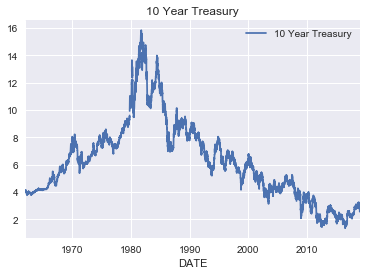

In [36]:
series_name = '10 Year Treasury'
data = data.rename(columns={series_code:series_name})
data.plot(title=series_name)
plt.show()

### Visualize the long-term gold price trend

new data source to visualize the gold price trend over the last 50 years, specifically, the Gold Fixing Price 10:30 AM (London time) in London Bullion Market, in US Dollars.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13265 entries, 1968-04-01 to 2019-02-01
Data columns (total 1 columns):
GOLDAMGBD228NLBM    12856 non-null float64
dtypes: float64(1)
memory usage: 207.3 KB


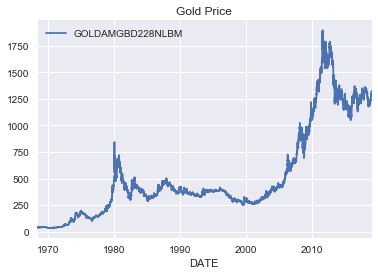

In [39]:
# Set start date
start = date(1968, 1, 1)

series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price')

# Show the plot
plt.show()

### Compare labor market participation and unemployment rates

Two economic data series in FRED are the Civilian Unemployment Rate ('UNRATE') and the Civilian Labor Force Participation Rate ('CIVPART').

These rates highlight two important aspects of the US labor market: the share of the civilian population that is currently unemployed or seeking employment, and the share of those active in the labor market that are in fact employed.

This means that the numbers indicate both the size of the labor market relative to the total population, as well as the size of unemployment relative to the labor market.

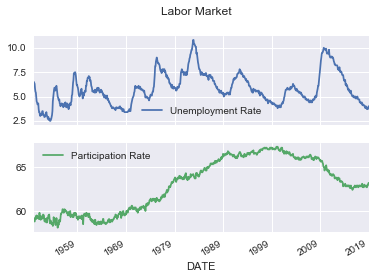

In [40]:
# Set the start date
start = date(1950, 1, 1)

# Define the series code
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

### Compare bond and stock performance

Bonds and stocks are the most important investment alternatives. Now that you can import data from both the Federal Reserve and Google Finance, you can compare the performance of both asset classes. You'll be using a Total Return Index for each class, which accounts for returns due to both price increases and payments like interest or dividends.

For bonds, you'll use the Bank of America Merrill Lynch US High Yield Total Return Index Value ('BAMLHYH0A0HYM2TRIV'). For stocks, you'll use the S&P 500 Index ('SP500'). Both are available for the past 10 years from the Federal Reserve's FRED service.

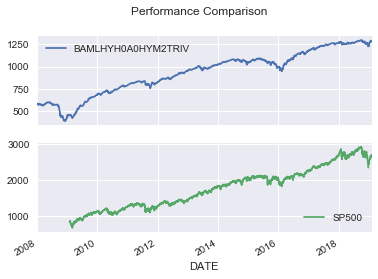

In [41]:
# Set the start date
start = date(2008, 1, 1)

# Set the series code
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(subplots=True, title='Performance Comparison')

# Show the plot
plt.show()

### Get ticker for largest company

In [43]:
nyse = nyse.sort_values('Market Capitalization', ascending=False)
nyse[['Stock Symbol', 'Company Name']].head()

,Stock Symbol,Company Name
1586,JNJ,Johnson & Johnson
1125,XOM,Exxon Mobil Corporation
1548,JPM,J P Morgan Chase & Co
80,BABA,Alibaba Group Holding Limited
1280,GE,General Electric Company


In [44]:
nyse['Sector'].unique()

array(['Health Care', 'Energy', 'Finance', 'Miscellaneous',
       'Public Utilities', 'Basic Industries', 'Consumer Services',
       'Consumer Non-Durables', 'Technology', 'Capital Goods',
       'Transportation', 'Consumer Durables', nan], dtype=object)

In [45]:
tech = nyse.loc[nyse.Sector=='Technology']

In [49]:
tech['Company Name'].head(2)

2144                                 Oracle Corporation
2692    Taiwan Semiconductor Manufacturing Company Ltd.
Name: Company Name, dtype: object

In [50]:
nyse.loc[nyse.Sector=='Technology','Market Capitalization'].idxmax()

2144

In [51]:
ticker = nyse.loc[(nyse.Sector=='Technology')&
                 (nyse['IPO Year']==2017 ),
                 'Market Capitalization'].idxmax()

### Top 5 listed consumer companies

Here, you will use this function to find out the five most valuable companies in the Consumer Services sector. This is measured with market capitalization, or the combined value of all shares in a company.

In [55]:
# Select companies in Consumer Services
consumer_services = listing_data[listing_data.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
print(consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head())

                   Company Name Exchange  Market Capitalization
4              Amazon.com, Inc.   nasdaq           4.221385e+11
3013      Wal-Mart Stores, Inc.     nyse           2.218646e+11
3014  Walt Disney Company (The)     nyse           1.789973e+11
6           Comcast Corporation   nasdaq           1.764745e+11
1438     Home Depot, Inc. (The)     nyse           1.752626e+11
